## Equally-Weighted Portfolio Backtest.

In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
dataset = Dataset.JKP

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

experiment_config = dataset.value()

experiment_config.N_LOOKBEHIND_PERIODS = None
experiment_config.REBALANCE_FREQ = REBAL_FREQ

factors = pd.read_csv(experiment_config.PATH_OUTPUT / "factors.csv")
factors["date"] = pd.to_datetime(factors["date"])
factors = factors.set_index("date")
factor_names = tuple(factors.columns.astype(str).tolist())
experiment_config.FACTORS = factor_names

preprocessor = Preprocessor()

runner = Runner(
    dataset_builder_fn=lambda config: build_jkp_dataset(config, verbose=True),
    experiment_config=experiment_config,
    trading_config=trading_config,
    verbose=True,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [4]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:29<00:00,  9.47it/s]


StrategyStatistics:
* final_nav = 6.155802
* geom_avg_total_r = 0.100306
* geom_avg_xs_r = 0.081009
* std_xs_r = 0.205517
* min_xs_r = -0.109368
* max_xs_r = 0.105879
* skew = -0.059176
* kurtosis = 10.082960
* max_dd = -0.525423
* sharpe = 0.394169
* alpha_buy_hold = 0.010420
* tracking_error_buy_hold = 0.044034
* ir_buy_hold = 0.236647
* factor_loadings = {'low_risk': 0.20927693212711723, 'momentum': -0.06743169375123023, 'quality': -0.05242411935522069, 'size': 0.01782321037879945, 'value': -0.12958374060804567, 'spx': 0.9998178998819665}
* alpha_benchmark = 0.012286
* alpha_benchmark_pvalue = 0.182552
* tracking_error_benchmark = 0.039022
* ir_benchmark = 0.314847
* ttest_pval = 0.456515
* levene_pval = 0.042278
* timing_ability_coef = 0.020263
* timing_ability_pval = 0.002466

In [5]:
result.std_xs_r, result.sharpe

(0.20551723318714532, 0.39416921677811556)

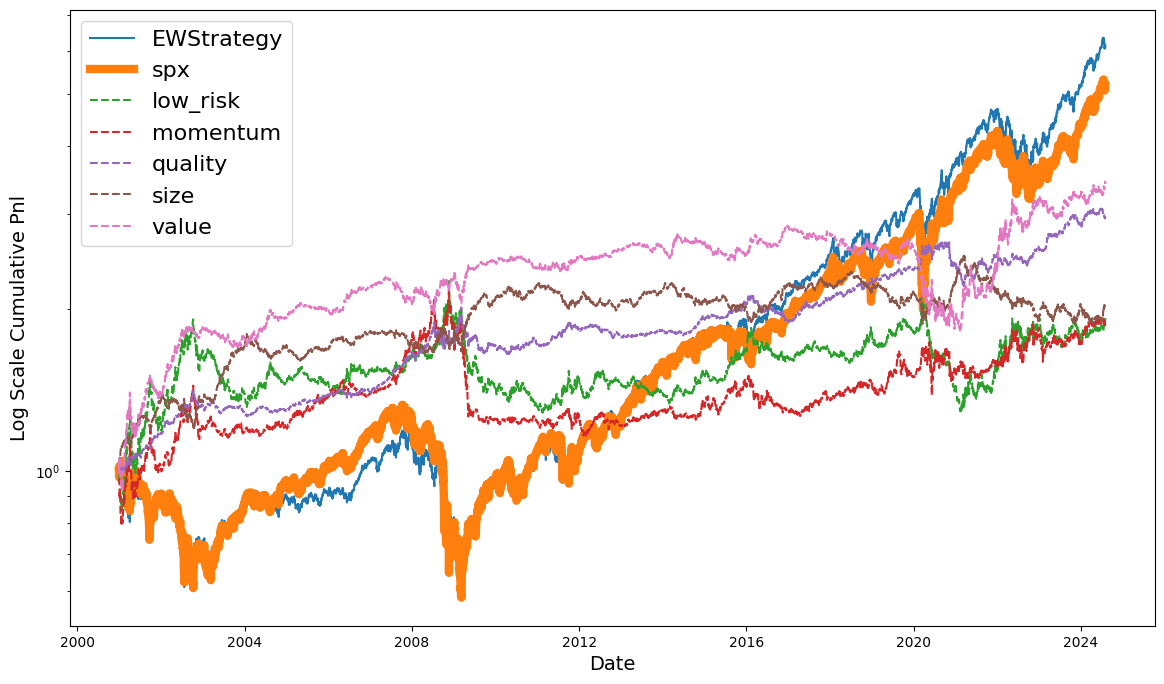

In [6]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

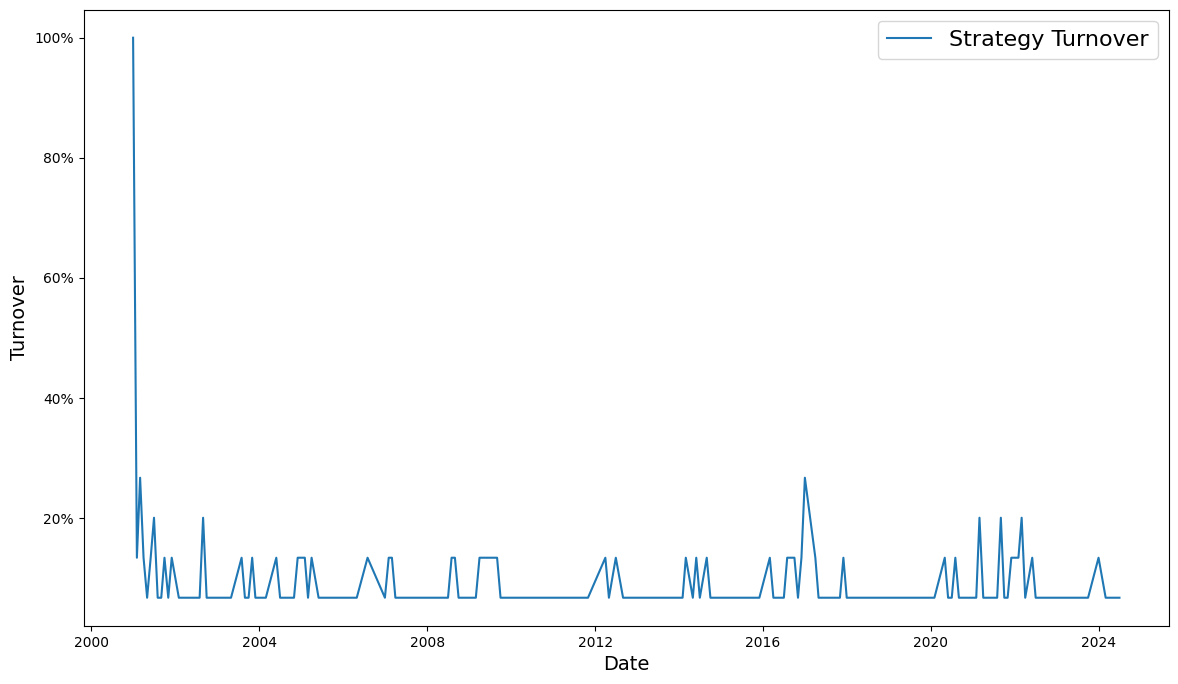

In [7]:
runner.plot_turnover()

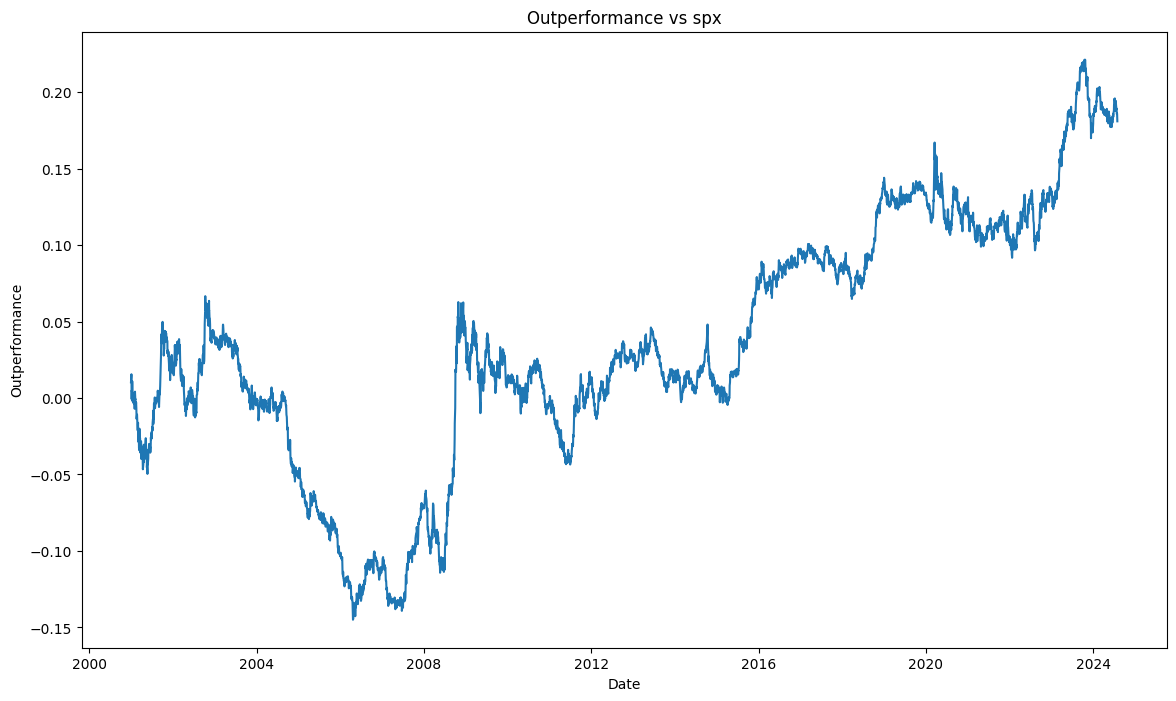

In [8]:
runner.plot_outperformance(mkt_only=True)

In [9]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")